# Center of Mass + Bounding Cuboids

In the HIC generator, each sequence is annotated with many interesting visual and textual modalities. Some examples of this are the Center of Mass and the Bounding Cuboids. In this notebook we will show how to extract and visualize those.

# Imports

In [1]:
import datagen
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch,Rectangle
from scripts.dghelpers import set_axes_equal,imshow, all_body_keypoints_2d, all_body_keypoints_3d

# Human Bounding Box and Cuboid

In [2]:
dataset = datagen.load('../resources/hic_home_security', dataset_config = datagen.DatasetConfig(environment="hic"))
data_point = dataset[4]

### Bounding Box

max y_2d: 309
min y_2d: 276
max X_2d: 320
min X_2d: 258


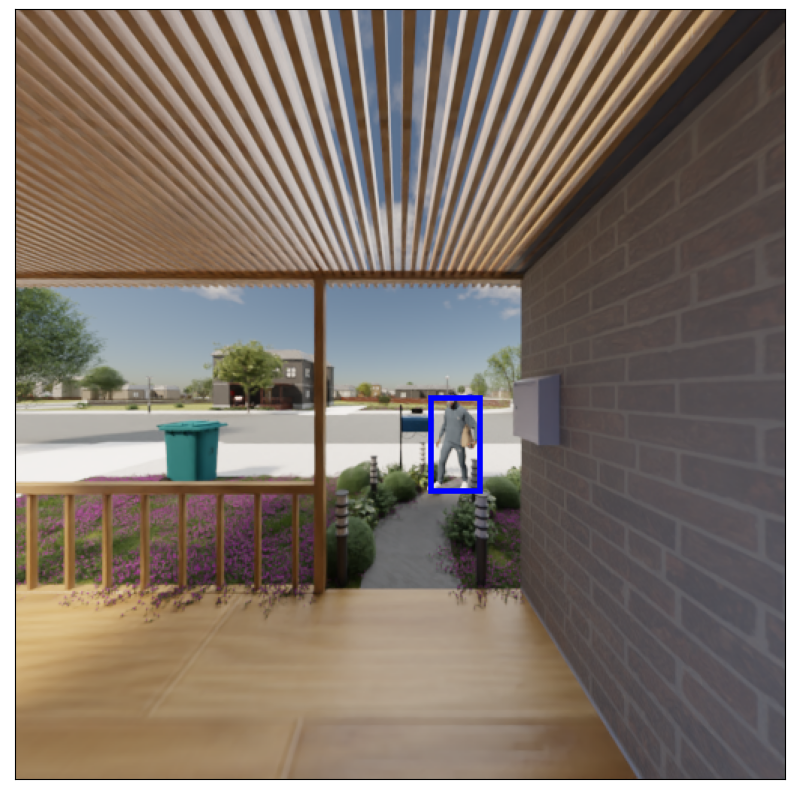

In [3]:
all_keypoints_2d = all_body_keypoints_2d(data_point)

max_y_2d = np.max(all_keypoints_2d[:,1])
min_y_2d = np.min(all_keypoints_2d[:,1])
print('max y_2d: '+ str(max_y_2d))
print('min y_2d: '+ str(min_y_2d))

min_x_2d = np.min(all_keypoints_2d[:,0])
max_x_2d = np.max(all_keypoints_2d[:,0])
print('max X_2d: '+ str(max_x_2d))
print('min X_2d: '+ str(min_x_2d))

#bottom of cuboid
p1 = [max_x_2d, min_y_2d]
p2 = [max_x_2d, max_y_2d]
p3 = [min_x_2d, max_y_2d]
p4 = [min_x_2d, min_y_2d]
bbox_width = max_x_2d - min_x_2d
bbox_height = max_y_2d - min_y_2d

bounding_box_human = np.vstack((p1,p2,p3,p4))
rect1 = Rectangle((min_y_2d, min_x_2d),
                  bbox_height,
                  bbox_width,
                  linewidth=4, edgecolor='b', facecolor='none')
imshow(data_point.visible_spectrum)
plt.gca().add_patch(rect1)

### Cuboid

max Z: 1.6666661500930786
min Z: 0.032041977107938796
max y: -0.41525817579693264
min y: -1.2431669343601575
max X: 4.309591770172119
min X: 3.6604142636060715


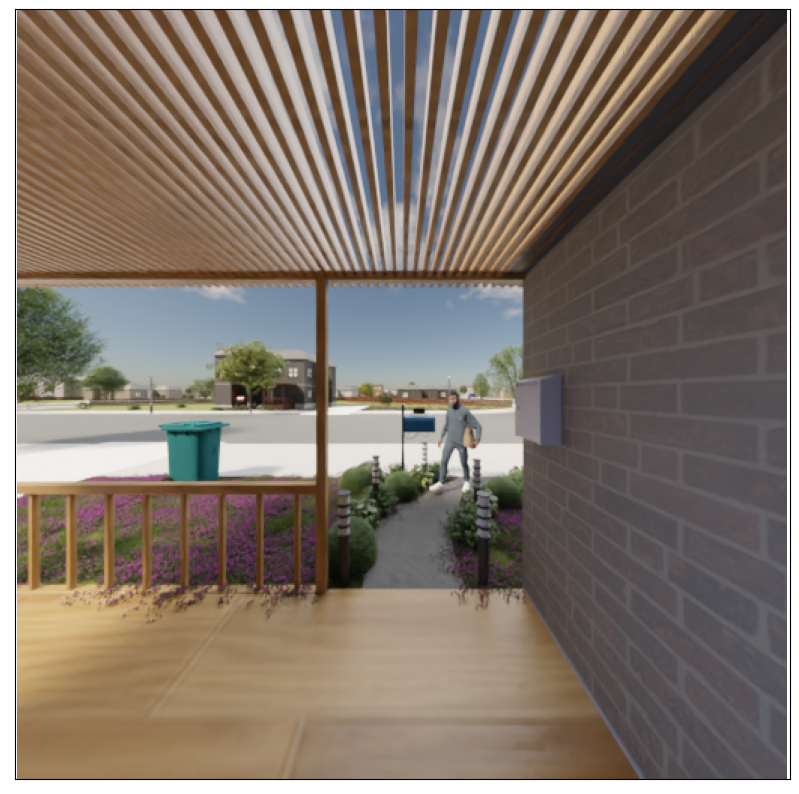

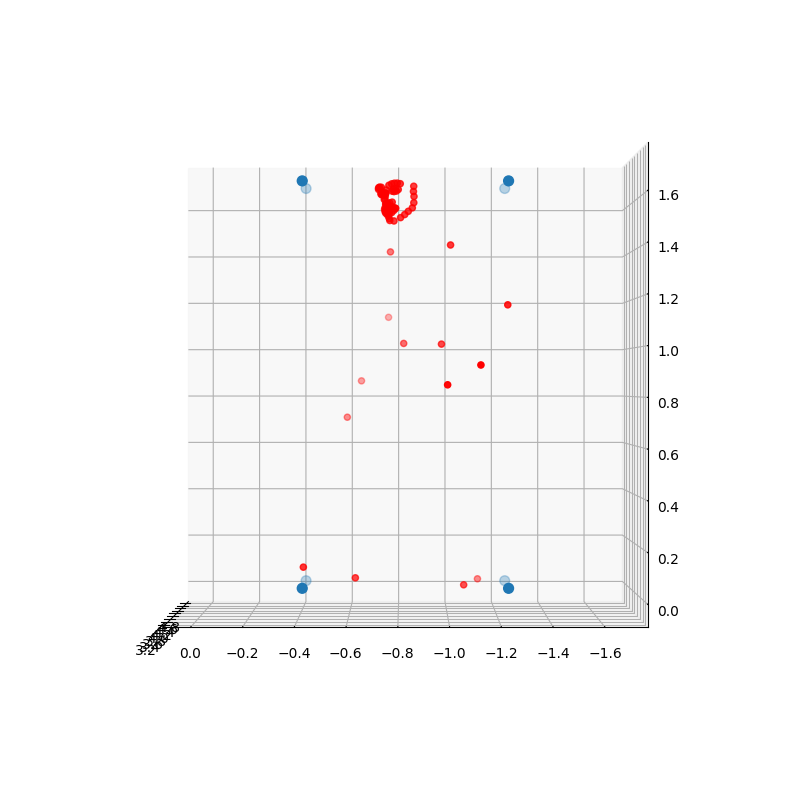

In [4]:
imshow(data_point.visible_spectrum)

all_keypoints_3d = all_body_keypoints_3d(data_point)

max_z = np.max(all_keypoints_3d[:,2])
min_z = np.min(all_keypoints_3d[:,2])
print('max Z: '+ str(max_z))
print('min Z: '+ str(min_z))

max_y = np.max(all_keypoints_3d[:,1])
min_y = np.min(all_keypoints_3d[:,1])
print('max y: '+ str(max_y))
print('min y: '+ str(min_y))

min_x = np.min(all_keypoints_3d[:,0])
max_x = np.max(all_keypoints_3d[:,0])
print('max X: '+ str(max_x))
print('min X: '+ str(min_x))

#bottom of cuboid
p1 = [max_x, min_y, min_z]
p2 = [max_x, max_y, min_z]
p3 = [min_x, max_y, min_z]
p4 = [min_x, min_y, min_z]
#top of cuboid
#bottom of cuboid
p5 = [max_x, min_y, max_z]
p6 = [max_x, max_y, max_z]
p7 = [min_x, max_y, max_z]
p8 = [min_x, min_y, max_z]

cuboid_human = np.vstack((p1,p2,p3,p4,p5,p6,p7,p8))
plt.axis('equal')
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(projection='3d',)

ax.scatter(*cuboid_human.T, s=50)
ax.scatter(*all_keypoints_3d.T,s=20,c=[[1,0,0]])
ax.set_box_aspect([1,1,1])
set_axes_equal(ax)
ax.view_init(elev=0, azim=180)